## Week 9: Day 2 – K-means Clustering

A cluster refers to a collection of data points aggregated together because of certain similarities.
k-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters.


## A simple example of clustering
### Basics of Cluster Analysis

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
# loading the dataset
data = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


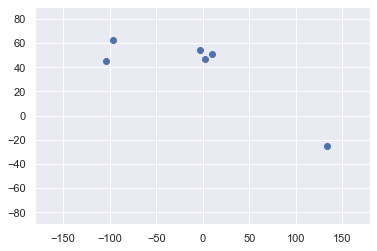

In [4]:
# plot the data

plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [5]:
# Selecting the features
# DataFrame.iloc(row indicate, column indicate) slices the dataframe, given rows and columns to be kept

x = data.iloc[:,1:3]

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
# intializing the kmeans algorithm and defining the number of clusters we want
kmeans = KMeans(2)

In [8]:
# fitting the model
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
# sklearn.cluster.KMeans.fit_predict(x) returns the cluster prediction in an array
# storing the fit_predict in a new variable identified_clusters

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [10]:
# lets create a dataframe so we can se things more clearly

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


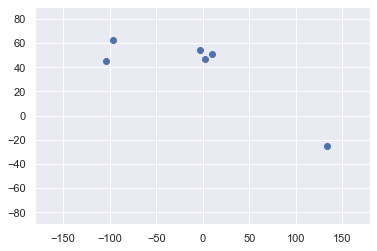

In [11]:
# lets plot all this on a scatter plot

plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

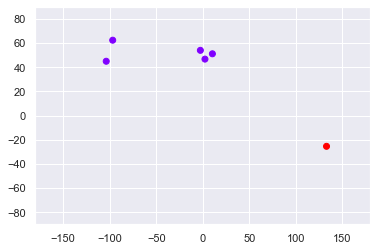

In [12]:
# lets set the colour map to rainbow 

plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [13]:
# Now lets change the number of cluster to 3
kmeans = KMeans(3)

In [14]:
# fitting the model
kmeans.fit(x)

KMeans(n_clusters=3)

In [15]:
# sklearn.cluster.KMeans.fit_predict(x) returns the cluster prediction in an array

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [16]:
# lets create a dataframe so we can se things more clearly

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


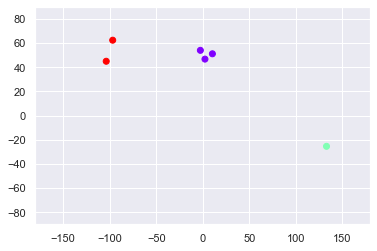

In [17]:
# lets plot all this on a scatter plot

plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Clustering categorical data

In [18]:
# map the data
# here we will be using our language column

data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [19]:
# selecting the features for clustering

x = data_mapped.iloc[:,3:4]

In [20]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [21]:
# Clustering with 3 clusters

kmeans = KMeans(3)

In [22]:
# fitting the model
kmeans.fit(x)

KMeans(n_clusters=3)

In [23]:
# clustering results

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [24]:
# lets create a dataframe so we can se things more clearly

data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


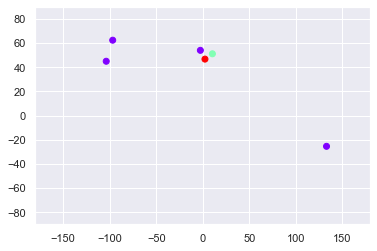

In [25]:
# lets plot all this on a scatter plot

plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [26]:
# (question) can we use both numeric and categorical data in clustering ?
# (yes)  lets go back to x and take the last three series instead of just one

# selecting the features for clustering

x = data_mapped.iloc[:,1:4]

In [27]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [28]:
# Clustering with 3 clusters

kmeans = KMeans(3)

In [29]:
# fitting the model
kmeans.fit(x)

KMeans(n_clusters=3)

In [30]:
# clustering results

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [31]:
# lets create a dataframe so we can se things more clearly

data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


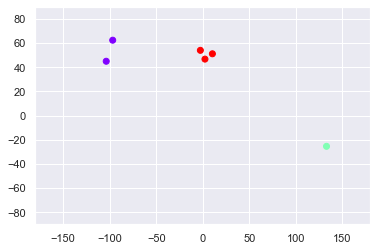

In [32]:
# lets plot all this on a scatter plot

plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

This time the 3 clusters are based simply on the geographical location instead of language and location so what if we use 2 clusters

In [33]:
# Clustering with 2 clusters

kmeans = KMeans(2)

In [34]:
# fitting the model
kmeans.fit(x)

KMeans(n_clusters=2)

In [35]:
# clustering results

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [36]:
# lets create a dataframe so we can se things more clearly

data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


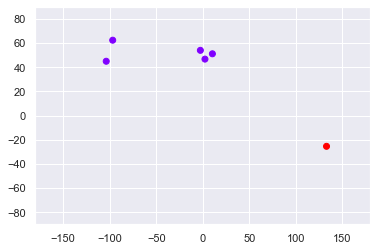

In [37]:
# lets plot all this on a scatter plot

plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### How to choose the number of clusters
### selecting the number of clusters 
### wcss (within-cluster sum of squares)

In [38]:
# to get the wcss of our data we write the code below

kmeans.inertia_

13208.958119999996

In [39]:
# to plot the elbow we need to solve the problem with 1,2,3,4,5,6 clusters and calaulate the wscc for each of them
# lets do that with the loop
# first we create and empty list called wscc


wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\Zachary_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-Cluster Sum of Squares')

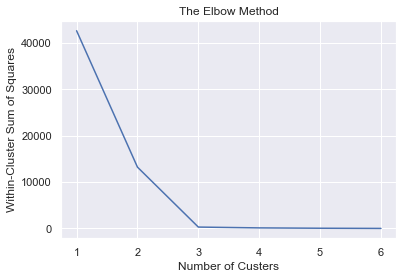

In [41]:
# the elbow method

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Custers')
plt.ylabel('Within-Cluster Sum of Squares')

finally we will use the elbow method to decide the optimal number of clusters. there are 2 points which can be the elbow, 2 or 3. a 3 cluster solution is definitly a better one. a 2 cluster will be suboptimal as there is a big gap between 2 and 3


### Market Segmentation with Cluster Analysis (Part 1)


In [42]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans 

In [43]:
# loading the data

data = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\3.12. Example.csv')

In [44]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

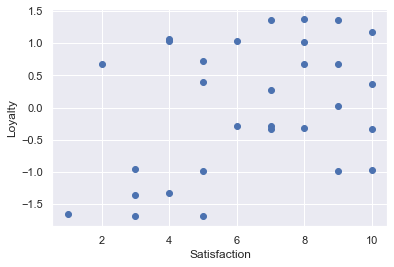

In [45]:
# lets plot the data

plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [46]:
# selecting the featuers for clustering

x = data.copy()

In [47]:
# fitting the model

kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [50]:
# clustering results

clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

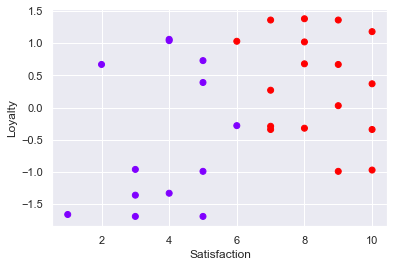

In [54]:
# lets plot plot the data

plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [56]:
# standardizing the variables

# sklearn.preprocessing.scale(x) scale(standardizes with mean 0, and standard deviation of 1 by defult) each variable(column) separately

from sklearn import preprocessing

x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [57]:
# take advantage of the elbow method

wcss = []

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\Zachary_B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.358871893303257,
 3.7799886162052667]

Text(0, 0.5, 'WCSS')

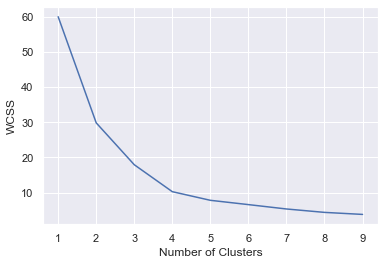

In [58]:
# lets plot wcss verses the number of clusters

plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Given this grarh think about the number of cluster we should use

In [61]:
# explore clustering solution and selecting the number of clusters
# lets declear a new varriable kmeans_new

kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [62]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

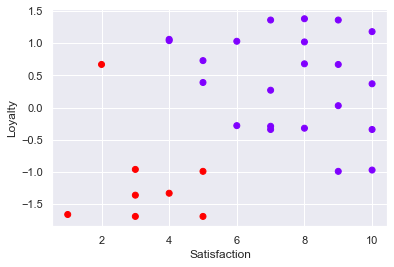

In [64]:
# we will plot the data without standardizing it

plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [66]:
# lets change the number of clusters to 3and rerun the code again

kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [67]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

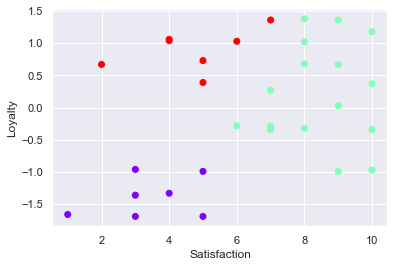

In [68]:
# we will plot the data without standardizing it

plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [69]:
# lets check out a 4 cluster solution
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [70]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,0
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

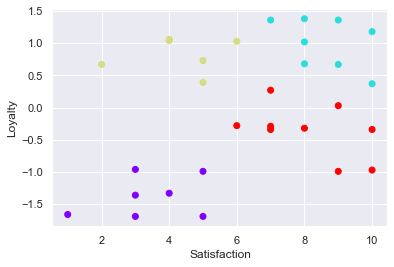

In [71]:
# we will plot the data without standardizing it

plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [72]:
# how about we try with 5 cluster

kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [73]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,4
7,8,-0.32,2
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

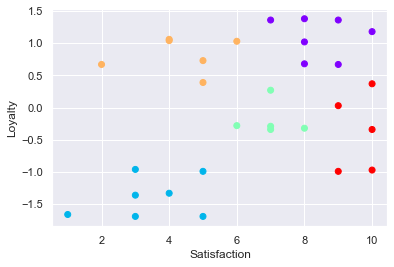

In [74]:
# we will plot the data without standardizing it

plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [75]:
# lets finish up with 9 clusters

kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [76]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,5
6,10,-0.97,4
7,8,-0.32,1
8,8,1.02,7
9,8,0.68,7


Text(0, 0.5, 'Loyalty')

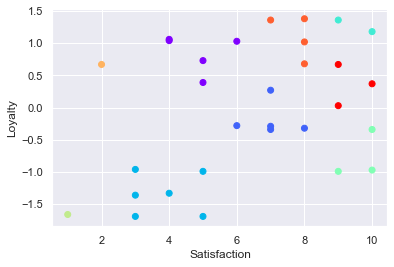

In [77]:
# we will plot the data without standardizing it

plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

the 4 and 5 cluster solutions were the best ones, which one you want to use depends on the problem at hand